## DATASETS used in this notebooks can be found here:
    TESS: https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess
    RAV: https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio
    SAVEE: https://www.kaggle.com/barelydedicated/savee-database
    CREMA: https://www.kaggle.com/ejlok1/cremad

In [ ]:
# pip install librosa

In [ ]:
# pip install tensorflow

In [ ]:
# pip install Keras

In [4]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import json
import seaborn as sns
import pickle

# ignore warnings
import warnings
warnings.simplefilter('ignore')

In [5]:
TESS = "TESS/TESS Toronto emotional speech set data/"
RAV = "RAV/audio_speech_actors_01-24/"
SAVEE = "SAVEE/"
CREMA = "CREMAD/"

## SAVEE

In [6]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('negative')
    elif i[-8:-6]=='_d':
        emotion.append('negative')
    elif i[-8:-6]=='_f':
        emotion.append('negative')
    elif i[-8:-6]=='_h':
        emotion.append('positive')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('negative')
    elif i[-8:-6]=='su':
        emotion.append('positive')
    else:
        emotion.append('error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

negative    240
neutral     120
positive    120
Name: labels, dtype: int64

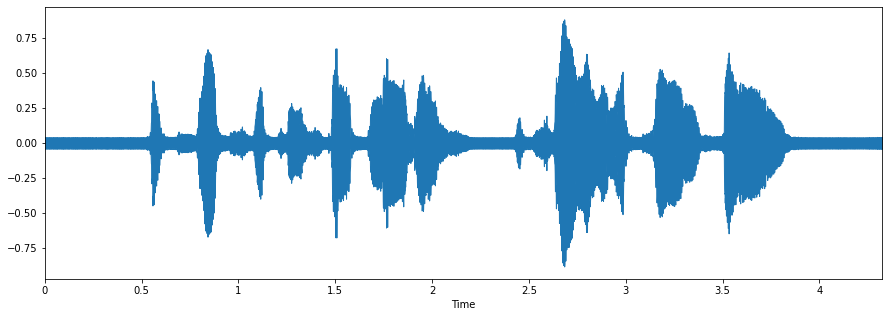

In [7]:
# use the well known Librosa library for this task 
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

## RAVDESS

In [8]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        path.append(RAV + i + '/' + f)

In [9]:
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral',
                         2:'neutral',
                         3:'positive',
                         4:'negative',
                         5:'negative',
                         6:'negative',
                         7:'negative',
                         8:'positive'})

RAV_df.columns = ['emotion']
RAV_df['labels'] = RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['emotion'], axis=1)
RAV_df.labels.value_counts()

negative    768
positive    384
neutral     288
Name: labels, dtype: int64

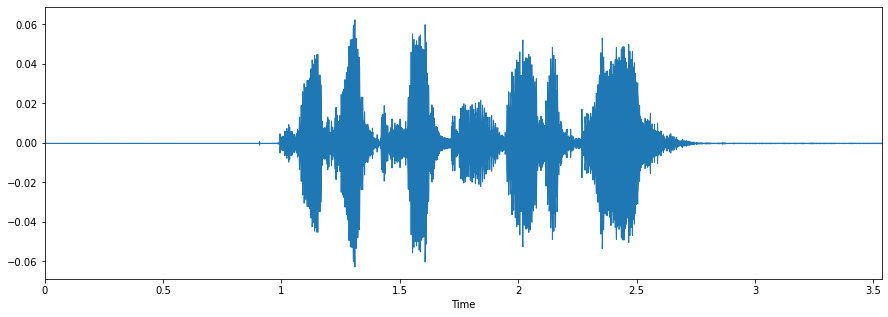

In [10]:
# Pick a surprised track
fname = RAV + 'Actor_07/03-01-08-01-01-02-07.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

## TESS

In [11]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [12]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('negative')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('negative')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('negative')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('positive')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('positive')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('negative')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

negative    1600
positive     800
neutral      400
Name: labels, dtype: int64

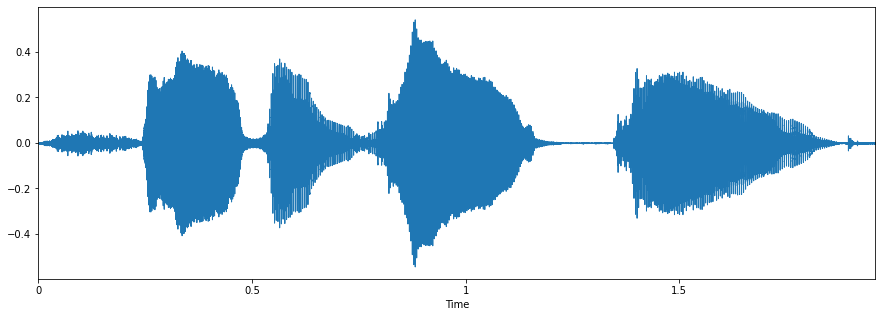

In [13]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

## CREMA-D

In [15]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [16]:
emotion = []
path = []

for i in dir_list: 
    part = i.split('_')
    if part[2] == 'SAD':
        emotion.append('negative')
    elif part[2] == 'ANG':
        emotion.append('negative')
    elif part[2] == 'DIS':
        emotion.append('negative')
    elif part[2] == 'FEA':
        emotion.append('negative')
    elif part[2] == 'HAP':
        emotion.append('positive')
    elif part[2] == 'NEU':
        emotion.append('neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

negative    5084
positive    1271
neutral     1087
Name: labels, dtype: int64

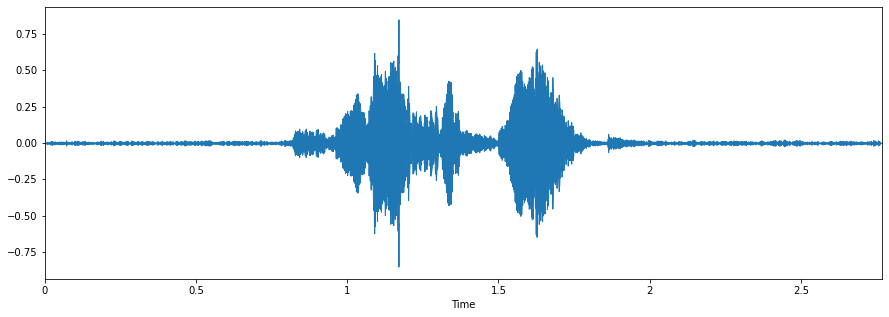

In [17]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

## Combine the data into one DataFrame

In [18]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
#df.to_csv("Data_path.csv",index=False)

negative    7692
positive    2575
neutral     1895
Name: labels, dtype: int64


In [19]:
print(df.shape)
df.head()

(12162, 3)


,labels,source,path
0,negative,SAVEE,SAVEE/JK_sa01.wav
1,negative,SAVEE,SAVEE/JK_sa15.wav
2,neutral,SAVEE,SAVEE/DC_n13.wav
3,positive,SAVEE,SAVEE/DC_su09.wav
4,neutral,SAVEE,SAVEE/DC_n07.wav
